In [28]:
import os
import mne
import matplotlib
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mne.preprocessing import (ICA, create_eog_epochs)
# from pylab import rcParams
# from autoreject import AutoReject
# from autoreject import get_rejection_threshold
# from pyprep.find_noisy_channels import NoisyChannels

In [29]:
# matplotlib.use("Qt5Agg")
%matplotlib inline
mne.set_config("MNE_USE_CUDA", "true")
plt.rcParams.update({"font.size": 16})

In [30]:
# set path
data_path = "D:\\EGI_DATA\\EGI_EPOCH"
figure_path = "C:\\Users\\const\\OneDrive\\Desktop\\research\\writing&&plot\\A resource for assessing dynamic binary choices in the adult brain using EEG and mouse tracking\\figures"
eeg_path = "eeg"
# set task name
foodtask = "foodchoice"
wordtask = "wordchoice"
imagetask = "imagechoice"
# witask = "wordimagematch"
rest = "rest"
# epoch windows
tmin = -0.2
tmax = 0.8
random_state = 97

In [4]:
# exclude_subjects = [1, 2, 6, 11, 12, 24, 28]

## read evoked data

In [35]:
task = foodtask
evokeds = {"left": [], "right": []}
for subject_id in range(1, 32):
    # if subject_id in exclude_subjects:
    #     continue
    sub = "sub-%03d" % subject_id
    print("processing subject: %s" % sub)
    for key, value in evokeds.items():
        # contrast = mne.read_evokeds(op.join(data_path, '%s_highpass-%sHz-ave.fif' % (sub, l_freq)), condition='contrast')
        epoch = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
        epoch.apply_baseline((None, 0.0))
        epoch.pick_types(meg=False, eeg=True)
        evokeds[key].append(epoch[key].average())

processing subject: sub-001
Reading D:\EGI_DATA\EGI_EPOCH\sub-001\eeg\sub-001_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
279 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Reading D:\EGI_DATA\EGI_EPOCH\sub-001\eeg\sub-001_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
279 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
processing subject: sub-002
Reading D:\EGI_DATA\EGI_EPOCH\sub-002\eeg\sub-002_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting m

In [ ]:
left = mne.combine_evoked(evokeds["left"], "equal")
right = mne.combine_evoked(evokeds["right"], "equal")

In [ ]:
overall = mne.combine_evoked([left, right], "equal")

In [ ]:
overall.plot(["E129"])

In [ ]:
left.plot(["E129"])
plt.show()

In [ ]:
right.plot(["E129"])
plt.show()

In [ ]:
# mne.viz.plot_compare_evokeds({"left": left, "right": right}, show_sensors=True)

In [ ]:
# left.plot_topomap(times=[-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], ch_type="eeg")
# plt.show()

In [ ]:
# right.plot_topomap(times=[-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], ch_type='eeg')
# plt.show()

In [ ]:
# right.plot_topo(color="g", legend=False)
# plt.show()

In [ ]:
left.plot_joint()
plt.show()

In [ ]:
right.plot_joint()
plt.show()

In [ ]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch

In [ ]:
# define frequencies of interest (log-spaced)
freqs = np.logspace(*np.log10([1, 30]), num=8)
# different number of cycle per frequency
n_cycles = freqs / 2.

In [ ]:
power, itc = tfr_morlet(left, freqs=freqs, n_cycles=n_cycles, picks=mne.pick_types(left.info, eeg=True), use_fft=True, return_itc=False, decim=3, n_jobs=16)

In [ ]:
power.plot(["E104"], baseline=(None, 0), mode="logratio", title="E104")
plt.show()

In [ ]:
# mne.viz.plot_events(stim_events, sfreq=raw_downsampled.info["sfreq"], first_samp=raw_downsampled.first_samp, event_id=stim_event_dict)
# plt.show()

In [ ]:
# epochs.plot(n_epochs=10, scalings=0.0001, events=epochs.events, event_id=stim_event_dict, event_color={"animate/left": "red", "animate/right": "blue", "inanimate/left": "green", "inanimate/right": "yellow"})
# plt.show()

In [ ]:
# epochs["animate/left"].plot_psd()
# plt.show()

In [ ]:
# epochs["animate/right"].plot_psd_topomap()
# plt.show()

In [ ]:
# epochs["animate/right"].average().plot()

In [ ]:
fig = mne.viz.plot_compare_evokeds([epoch_clean["animate"].average(), epoch_clean["inanimate"].average()], picks=[ch], legend="lower right", truncate_xaxis=False, show_sensors=False)

## single subject

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated


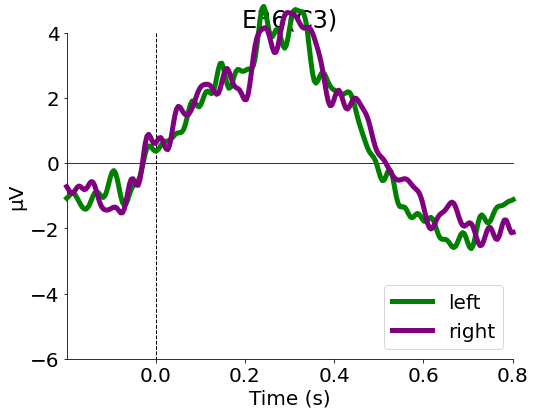

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated


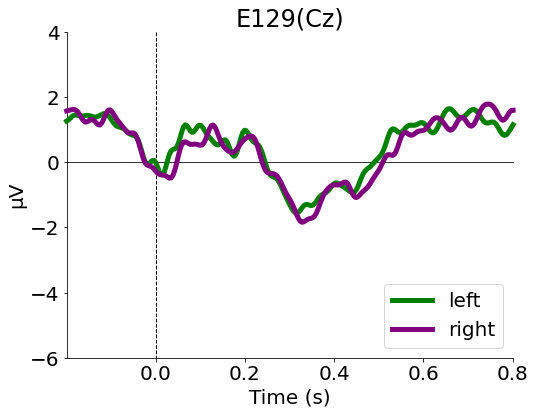

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated


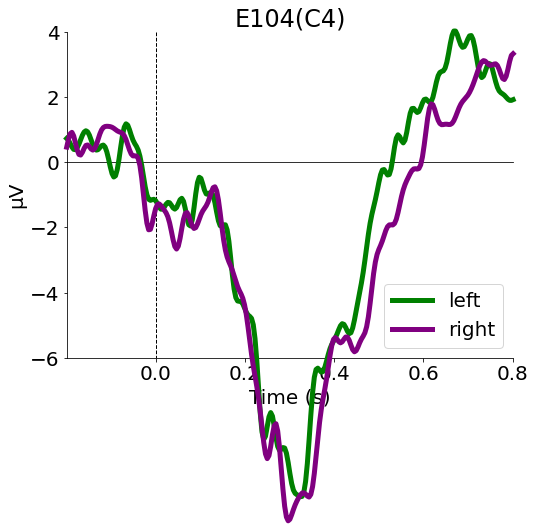

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


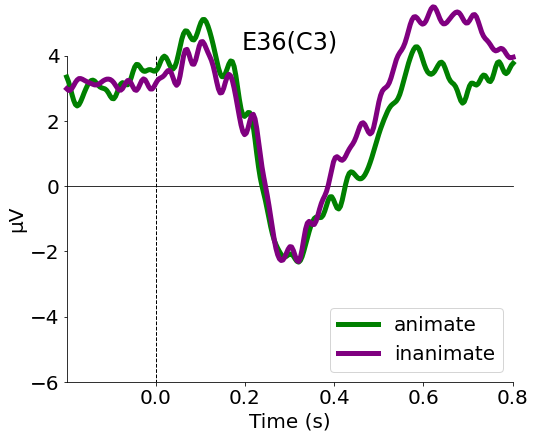

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


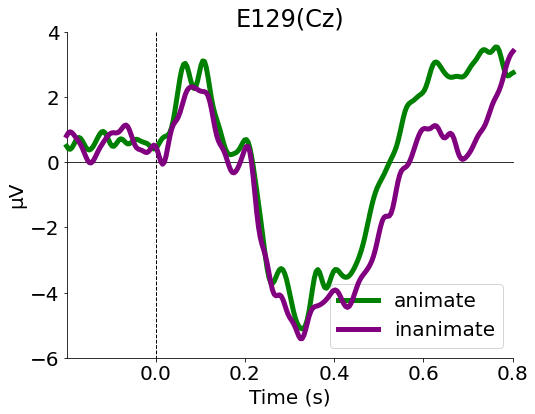

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


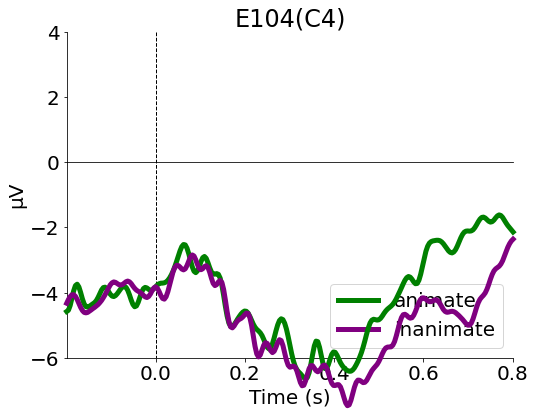

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


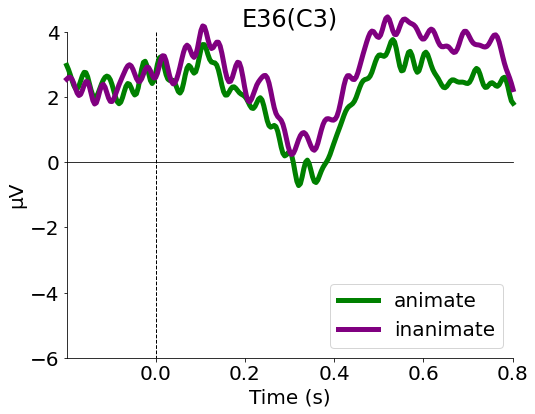

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


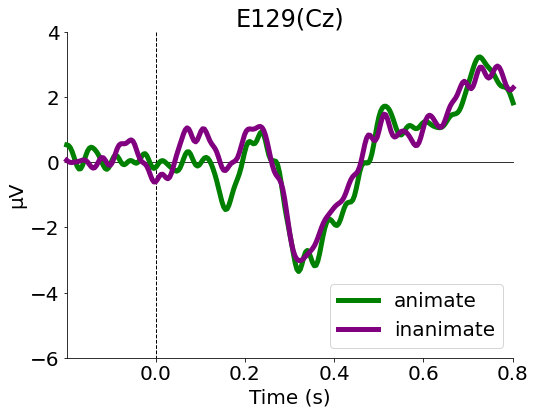

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


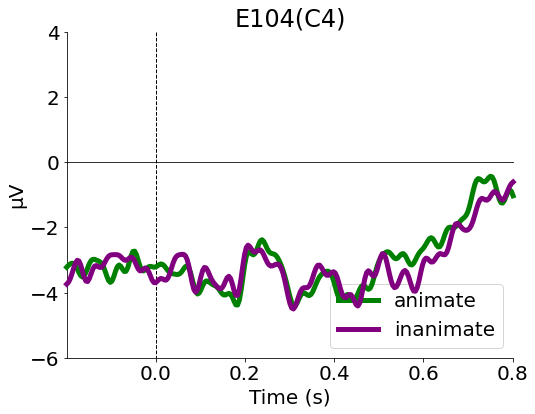

In [56]:
# plot combined conditions for image&&word task
sub = "sub-009"
plt.rcParams.update({"font.size": 20})
ch2title = dict(zip(["E36", "E129", "E104"], ["E36(C3)", "E129(Cz)", "E104(C4)"]))
for i, task in enumerate([foodtask, imagetask, wordtask]):
    for ch in ["E36", "E129", "E104"]:
    # for ch in ["E129"]:
        epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
        if task == foodtask:
            cond0, cond1 = "left", "right"
        else:
            cond0, cond1 = "animate", "inanimate"
        fig = mne.viz.plot_compare_evokeds({cond0: epoch_clean[cond0].average(), cond1: epoch_clean[cond1].average()}, picks=[ch], colors={cond0: "green", cond1: "purple"}, legend="lower right", truncate_xaxis=False, show_sensors=False, title=ch2title[ch], ylim=dict(eeg=[-6, 4]), styles={cond0: {"linewidth": 5}, cond1:{"linewidth": 5}})
        # fig[0].xticks(size=20)
        # fig[0].yticks(size=20)
        plt.show()
        fig[0].savefig(os.path.join(figure_path, "{}_channel-{}_erp.svg".format(task, ch)), bbox_inches="tight")

In [8]:
sub = "sub-009"
task = wordtask
epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


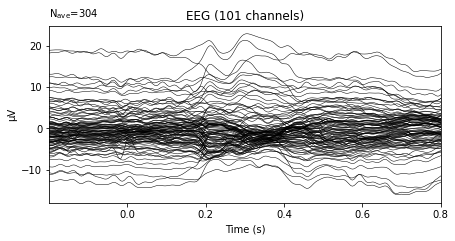

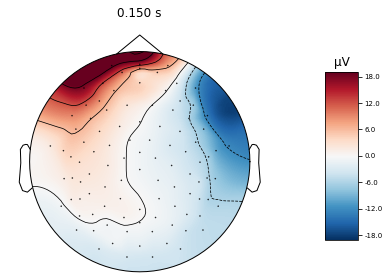

In [9]:
epoch_clean.average().plot(time_unit='s')
epoch_clean.average().plot_topomap(times=[0.15], size=3., time_unit='s')
plt.show()

In [ ]:
chan_selection = ["E36", "E104"]

In [ ]:
epoch_clean.plot_psd()
plt.show()

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated


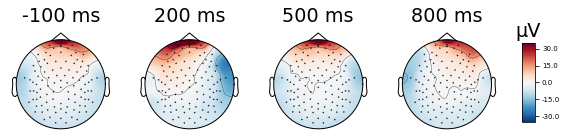

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated


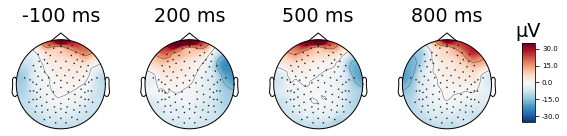

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


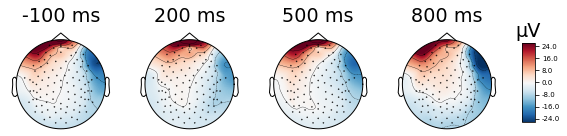

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


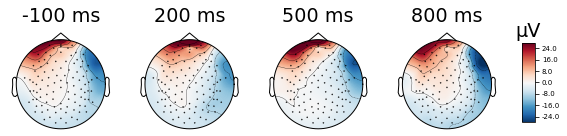

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


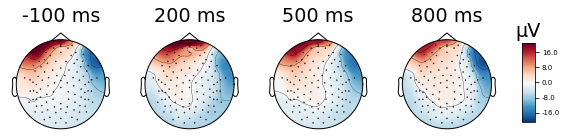

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


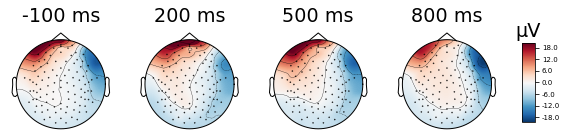

In [27]:
# plot combined conditions for image&&word task
sub = "sub-009"
for task in [foodtask, imagetask, wordtask]:
    # for ch in ["E36", "E129", "E104"]:
    for side in ["left", "right"]:
        epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
        fig =  epoch_clean[side].average().plot_topomap(times=[-0.1, 0.2, 0.5, 0.8], time_unit="ms", size=1.2)
        plt.show()
        fig.savefig(os.path.join(figure_path, "{}_side-{}_topomap.svg".format(task, side)), bbox_inches="tight")

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


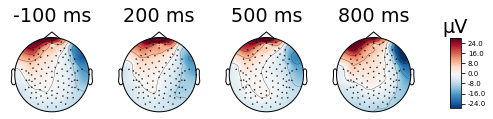

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated


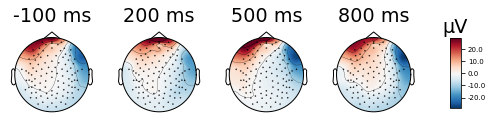

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


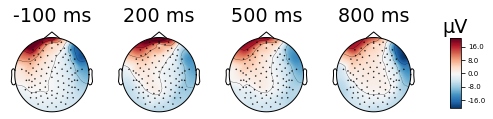

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated


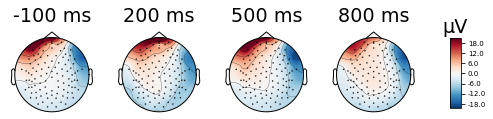

In [16]:
# plot combined conditions for image&&word task
sub = "sub-009"
for task in [imagetask, wordtask]:
    # for ch in ["E36", "E129", "E104"]:
    for cond in ["animate", "inanimate"]:
        epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
        fig =  epoch_clean[cond].average().plot_topomap(times=[-0.1, 0.2, 0.5, 0.8], time_unit="ms", ch_type="eeg")
        plt.show()
        fig.savefig(os.path.join(figure_path, "{}_side-{}_topomap.svg".format(task, cond)), bbox_inches="tight")

In [ ]:
epoch_clean["left"].average().plot_topomap(times=np.arange(-0.1, tmax, 0.2), time_unit="s")
plt.show()

In [ ]:
epoch_clean["right"].average().plot_topomap(times=np.arange(-0.1, tmax, 0.1), time_unit='s')
plt.show()

In [ ]:
evoked_interp = epoch_clean["left"].average().copy().interpolate_bads(reset_bads=False)

In [ ]:
c3 = left.pick_channels(["E36"])

In [ ]:
c3.plot_topomap()

In [ ]:
# plot all conditions
# sub = "sub-009"
# for task in [foodtask, imagetask, wordtask]:
#     # for ch in ["E36", "E129", "E104"]:
#     for ch in ["E129"]:
#         epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
#         fig = mne.viz.plot_compare_evokeds([epoch_clean[key].average() for key, value in epoch_clean.event_id.items()], picks=[ch], legend="lower right", truncate_xaxis=False, show_sensors=False)
#         plt.show()
#         fig[0].savefig(os.path.join(figure_path, "{}_channel-{}_erp.svg".format(task, ch)), bbox_inches="tight")

In [ ]:
# fig = mne.viz.plot_compare_evokeds([epoch_clean[key].average() for key, value in epoch_clean.event_id.items()], picks=[ch], legend="lower right", truncate_xaxis=False, show_sensors="upper right")

In [ ]:
sub = "sub-009"
task = foodtask
epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)

In [ ]:
# evoked_combined = mne.channels.combine_channels(epoch_clean["left"], method='mean')
# evoked_combined.plot()

In [ ]:
epoch_clean["left"].copy().pick_channels(["E129"]).average().plot()
plt.show()

In [ ]:
# epoch_clean["left"].pick_types(eeg=True, eog=False).average().plot_joint()
# plt.show()

In [ ]:
# epoch_clean["left"].plot_image()

In [ ]:
# epoch_clean["right"].plot_image()

In [ ]:
epoch_clean["left"].plot_image(picks="E129")

In [ ]:
epoch_clean.plot_image(combine="mean")

## time frequency

In [ ]:
sub = "sub-009"
task = imagetask
epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)

In [28]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch

In [29]:
# define frequencies of interest (log-spaced)
freqs = np.logspace(*np.log10([1, 30]), num=10)
# different number of cycle per frequency
n_cycles = freqs / 2.

In [ ]:
power, itc = tfr_morlet(epoch_clean, freqs=freqs, n_cycles=n_cycles, picks=mne.pick_types(epoch_clean.info, eeg=True),  use_fft=True, return_itc=True, decim=3, n_jobs=16)

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-foodchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=16)]: Done  56 tasks      | elapsed:    5.2s
Applying baseline correction (mode: logratio)
[Parallel(n_jobs=16)]: Done  86 out of 101 | elapsed:    5.6s remaining:    0.9s
[Parallel(n_jobs=16)]: Done 101 out of 101 | elapsed:    5.6s finished


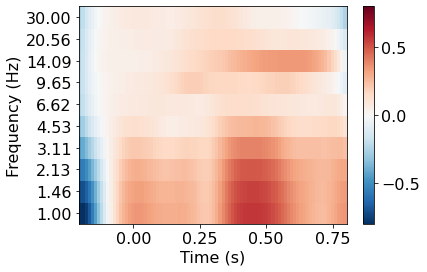

Applying baseline correction (mode: logratio)


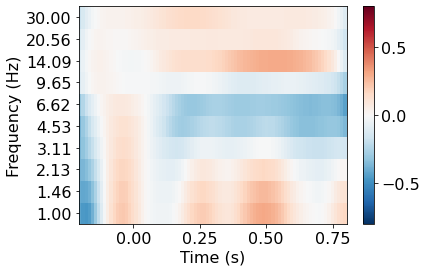

Applying baseline correction (mode: logratio)


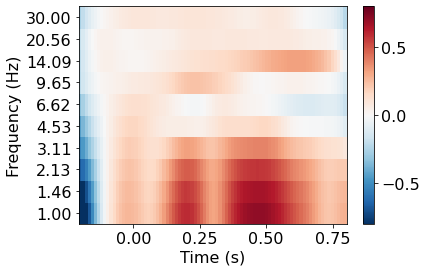

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-imagechoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.1s
Applying baseline correction (mode: logratio)
[Parallel(n_jobs=16)]: Done  86 out of 101 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 101 out of 101 | elapsed:    1.5s finished


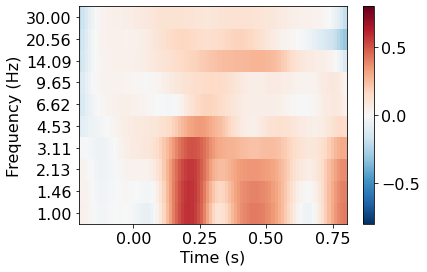

Applying baseline correction (mode: logratio)


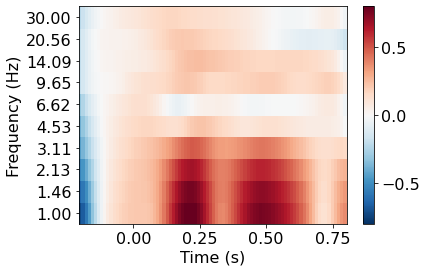

Applying baseline correction (mode: logratio)


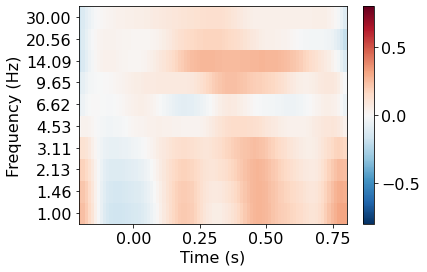

Reading D:\EGI_DATA\EGI_EPOCH\sub-009\eeg\sub-009_task-wordchoice_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
304 matching events found
No baseline correction applied
0 projection items activated
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.1s
Applying baseline correction (mode: logratio)
[Parallel(n_jobs=16)]: Done  86 out of 101 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 101 out of 101 | elapsed:    1.4s finished


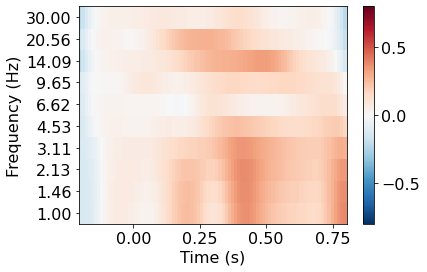

Applying baseline correction (mode: logratio)


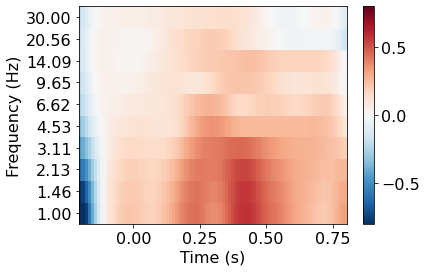

Applying baseline correction (mode: logratio)


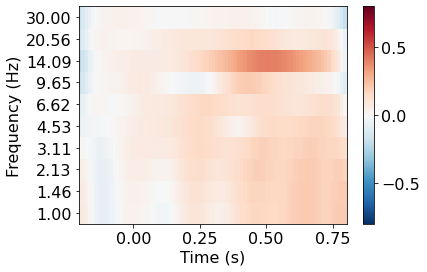

In [33]:
sub = "sub-009"
for task in [foodtask, imagetask, wordtask]:
    epoch_clean = mne.read_epochs(os.path.join(data_path, sub, eeg_path, "{}_task-{}_epo.fif".format(sub, task)), preload=True)
    power, itc = tfr_morlet(epoch_clean, freqs=freqs, n_cycles=n_cycles, picks=mne.pick_types(epoch_clean.info, eeg=True),  use_fft=True, return_itc=True, decim=3, n_jobs=16)
    for ch in ["E36", "E129", "E104"]:
        fig = power.plot([ch], baseline=(None, 0), mode="logratio", title="", vmin=-0.8, vmax=0.8)
        # plt.show()
        fig.savefig(os.path.join(figure_path, "{}_channel_{}_TFR.svg".format(task, ch)), bbox_inches="tight")

In [ ]:
# epoch_clean.pick_types(eeg=True, eog=False).plot_psd_topomap()
# plt.show()

In [ ]:
# font1 = {'family' : 'Times New Roman',
# 'weight' : 'normal',
# 'size'   : 10,
# }

In [ ]:
# fig, axis = plt.subplots(1, 4, figsize=(7, 4))
# power.plot_topomap(tmin=tmin, tmax=tmax, fmin=0, fmax=4, baseline=(-0.5, 0), mode="logratio", axes=axis[0], title="Delta", show=False)
# power.plot_topomap(tmin=tmin, tmax=tmax, fmin=4, fmax=8, baseline=(-0.5, 0), mode="logratio", axes=axis[1], title="Theta", show=False)
# power.plot_topomap(tmin=tmin, tmax=tmax, fmin=8, fmax=12, baseline=(-0.5, 0), mode="logratio", axes=axis[2], title="Alpha", show=False)
# power.plot_topomap(tmin=tmin, tmax=tmax, fmin=12, fmax=25, baseline=(-0.5, 0), mode="logratio", axes=axis[3], title="Beta", show=False)
# fig.tight_layout()
# plt.show()

In [ ]:
# epoch_clean["left"].copy().average().pick_types(eeg=True, eog=False).plot_topomap(np.arange(tmin, tmax+0.1, 0.2), time_unit="s")
# plt.show()

In [ ]:
# epoch_clean["right"].copy().average().pick_types(eeg=True, eog=False).plot_topomap(np.arange(tmin, tmax+0.1, 0.2), time_unit="s")
# plt.show()